In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

*min_samples_split* - с помощью этого параметра мы задаём, какое минимальное количество элементов должно остаться в очередной ветке дерева, 
чтобы алгоритм считал, что эту ветку всё ещё можно продолжать разделять. Стандартное значение этого параметра равно двум, 
что естественно: пока в ветке есть хотя бы два элемента разных классов, мы можем продолжать искать способ разделить их. 
Однако, мы можем увеличить этот параметр, например, до трёх. Тогда ветка с двумя элементами уже будет считаться неразделимой. 
Тут мы теряем в точности на тренеровочной выборке, потому что возникает вероятность того, что в одной такой ветке останутся 
элементы разных классов, но зато мы выигрываем в генерализации (возможно) и интерпретируемости, так как рост дерева вглубину 
ограничивается и оно становится проще.

In [2]:
dataset = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')
dataset

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1
...,...,...,...
233,1,0,0
234,1,1,0
235,1,0,1
236,1,1,1


In [3]:
y_train = pd.DataFrame(dataset.pop('num'))
y_train

,num
0,1
1,1
2,1
3,0
4,1
...,...
233,0
234,0
235,1
236,1


In [4]:
dataset

,sex,exang
0,1,1
1,1,1
2,1,0
3,1,0
4,1,0
...,...,...
233,1,0
234,1,1
235,1,0
236,1,1


In [5]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [6]:
clf.fit(dataset,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(167.4, 181.2, 'X[1] <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(83.7, 108.72, 'X[0] <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]')]

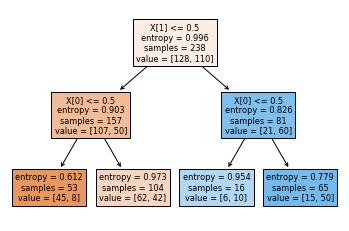

In [7]:
tree.plot_tree(clf, filled=True)

In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # пропорция разбиения - 33%

In [10]:
dt = DecisionTreeClassifier()

In [11]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
predicted = dt.predict(X_test)
predicted

array([2, 1, 2, 0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 2, 2, 2,
       1, 1, 1, 0, 1, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2])

In [13]:
y_test

array([2, 1, 2, 0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 2, 1, 1,
       1, 1, 1, 0, 1, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2])

In [14]:
y_test == predicted

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

cross_validate Разделение данных на kk частей, тренировка на k - 1 частях, тестирование на оставшейся; 
так для каждой части

LeavePOut Разделение данных на 2 части с n - k и k наблюдениями, на первой идёт тренировка, 2-ая - для предсказания; 
идёт ротация по всем наблюдениям

StratifiedKFold k-fold cross validation с учётом количества наблюдений в классах

train_test_split Разделение имеющихся данных на тестовый и тренировочный наборы

ShuffleSplit Аналог обычного разделения на тестовый и тренировочный датасэты с большим числом таких случайных разделений

LeaveOneOut Разделение данных на 2 части с n - 1 и 1 наблюдением, на первой идёт тренировка, 2-ая - для предсказания; 
каждое наблюдение побывает во второй части

Подробнее: http://scikit-learn.org/stable/modules/cross_validation.html

В обычном сплите получается всего 1 пара train и test datasets, в k-fold кросс-валидации их будет уже k, а 
в leave-one-out - по числу наблюдений

Одно дерево - хорошо, но где гарантии, что оно является лучшим, или хотя бы близко к нему? Одним из способов найти 
более-менее оптимальный набор параметров дерева является перебор множества деревьев с разными параметрами и выбор подходящего.
Для этой цели существует класс GridSearchCV, перебирающий каждое из сочетаний параметров среди заданных для модели, 
обучающий её на данных и проводящих кросс-валидацию. После этого в аттрибуте .best_estimator_ храниться модель с лучшими 
параметрами.

Это применимо не только к деревьям, но и к другим моделям sklearn.

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
clf = DecisionTreeClassifier()
# Осуществите перебор всех деревьев на данных ириса по следующим параметрам:
search = GridSearchCV(clf, {'max_depth': range(1, 11), # максимальная глубина - от 1 до 10 уровней
                           'min_samples_split': range(2, 11), # минимальное число проб для разделения - от 2 до 10
                           'min_samples_leaf': range(1, 11)}) # минимальное число проб в листе - от 1 до 10

In [17]:
search.fit(X, y)
best_tree = search.best_estimator_
best_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Чем больше данных, сложность модели и число её параметров, тем дольше будет вестись поиск GridSearchCV. Однако бывают случаи, когда модель нужна здесь и сейчас, и для этого есть RandomizedSearchCV! Пробегаясь по рандомной подвыборке параметров из указанных, он ищет наиболее хорошую модель и делает это быстрее полного перебора параметров, хотя и может пропустить оптимальные параметры.

При классификации модель может допускать ошибки, присваивая наблюдению неверный класс. Существуют различные метрики оценки качества предсказаний, которые базируются на 4-ёх параметрах - true positive, false positive, false negative и true negative, соответствующих тому какой класс был присвоен наблюдениям каждого из классов. Матрицу из 4-ёх (в случае бинарной классификации) этих параметров называют confusion matrix.

In [20]:
# conf_matrix = confusion_matrix(y_test, predictions)

# Вернемся к задаче прогнозирования ухода пользователей с курса в 
# 1.10-11-data-preprocessing

# 3.1 Увы! Дерево решений все еще переобучено :(

Глубина дерева важный параметр. Но есть еще. Какой размер выборки мы будем считать допустимым, чтобы еще раз посплититься в этой выборке?

# Перейдем в блокнот 2.3-2.5-titanic-disaster.ipynb